In [16]:
import pandas as pd
apt_s1 = pd.read_csv('study2_associative_session_1_data_transformed.csv').sort_values(by=['ID'], ascending=False)
apt_s2 = pd.read_csv('study2_associative_session_2_data_transformed.csv').sort_values(by=['ID'], ascending=False)

sum_ = apt_s1 + apt_s2


In [17]:
ave=sum_[['v1_mean',
 'v2_mean',
 'v3_mean',
 'v4_mean',
 'zr_mean',
 'a_mean',
 'ndt1_mean',
 'ndt2_mean',
 'ndt3_mean',
 'ndt4_mean',
 'sndt_mean',
 'alpha_mean',
    'accuracy_percentage',
    'mean_log_rt',
    'alpha_mean_boxcox_after_arcsin',
    'accuracy_percentage_boxcox_after_arcsin'
                            ]]/2

In [18]:
ave.insert(loc=0, column='ID', value=apt_s1['ID'])
data=ave

In [19]:
import numpy as np
import scipy.stats as stats

# Define the safe Mahalanobis function
def safe_mahalanobis(x=None, data=None, cov=None):
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

# Let's apply this to the first pair of parameters and check the result
pair = ['v1_mean', 'v2_mean']
data_pair = data[pair]

# Calculating Mahalanobis distance for the pair
mahal_distances = safe_mahalanobis(x=data_pair, data=data_pair)

# Determine the p-value threshold for outlier detection (p < 0.001)
p_value_threshold = 0.001

# Calculate the critical value for this p-value under the chi-squared distribution
critical_value = stats.chi2.ppf((1 - p_value_threshold), df=2)

# Identifying outliers
outliers = mahal_distances > critical_value

# Display the first few Mahalanobis distances and the outlier flags
mahal_distances[:5], outliers[:5]


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


(array([1.94215154, 0.85059097, 2.5127993 , 1.82129288, 0.31675372]),
 array([False, False, False, False, False]))

In [20]:
import numpy as np
import scipy.stats as stats

# Define the function for Mahalanobis distance
def safe_mahalanobis(x=None, data=None, cov=None):
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

# Select the first pair of parameters to demonstrate the process
params = ['v1_mean', 'v2_mean']
data_subset = data[params]

# Calculate the Mahalanobis distance for each observation
mahal_distances = safe_mahalanobis(x=data_subset, data=data_subset)

# Determine the threshold for outliers using the Chi-square distribution
p_value = 0.001
threshold = stats.chi2.ppf((1 - p_value), df=2)  # df is the number of variables, here 2

# Identify outliers
outliers = mahal_distances > threshold

# Print the number of outliers detected
num_outliers = np.sum(outliers)
num_outliers, threshold


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


(0, 13.815510557964274)

In [21]:
import numpy as np
import scipy.stats as stats

# Define the function for Mahalanobis distance
def safe_mahalanobis(x=None, data=None, cov=None):
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

# Select the first pair of parameters to demonstrate the process
params = ['v1_mean', 'v2_mean']
data_subset = data[params]

# Calculate the Mahalanobis distance for each observation
mahal_distances = safe_mahalanobis(x=data_subset, data=data_subset)

# Determine the threshold for outliers using the Chi-square distribution
p_value = 0.001
threshold = stats.chi2.ppf((1 - p_value), df=2)  # df is the number of variables, here 2

# Identify outliers
outliers = mahal_distances > threshold

# Print the number of outliers detected
num_outliers = np.sum(outliers)
num_outliers, threshold


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


(0, 13.815510557964274)

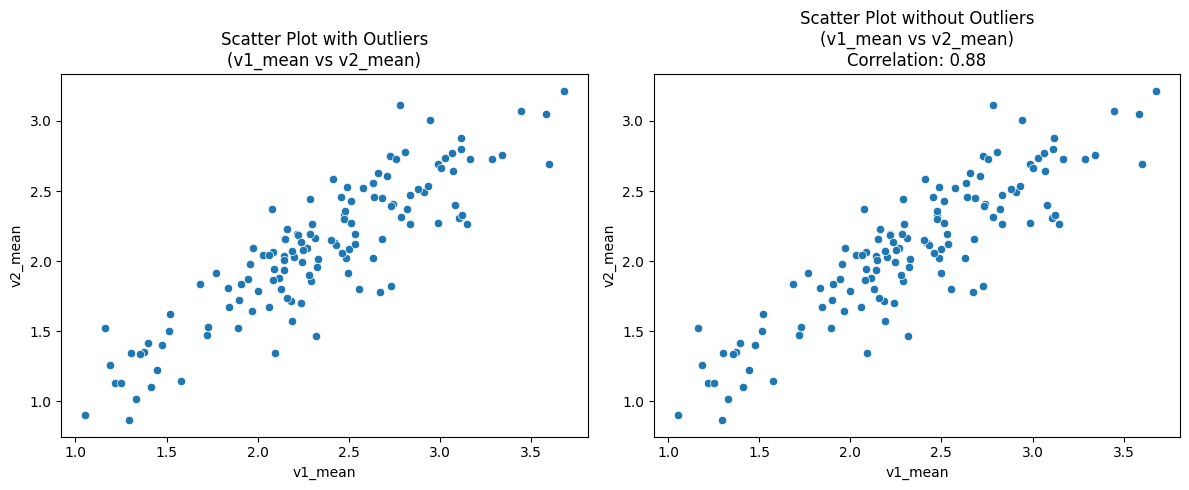

0.8833440983890073

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Remove outliers for the first pair
data_no_outliers = data_subset[~outliers]

# Calculate correlation for the first pair without outliers
correlation = data_no_outliers.corr().iloc[0, 1]

# Plotting to show the process
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot with outliers
sns.scatterplot(data=data_subset, x=params[0], y=params[1], ax=ax[0])
ax[0].set_title(f'Scatter Plot with Outliers\n({params[0]} vs {params[1]})')

# Scatter plot without outliers
sns.scatterplot(data=data_no_outliers, x=params[0], y=params[1], ax=ax[1])
ax[1].set_title(f'Scatter Plot without Outliers\n({params[0]} vs {params[1]})\nCorrelation: {correlation:.2f}')

plt.tight_layout()
plt.show()

correlation


In [23]:
from itertools import combinations

# List of all selected parameters
selected_params = ['v1_mean',
 'v2_mean',
 'v3_mean',
 'v4_mean',
 'zr_mean',
 'a_mean',
 'ndt1_mean',
 'ndt2_mean',
 'ndt3_mean',
 'ndt4_mean',
 'sndt_mean',
 'alpha_mean',
    'accuracy_percentage',
    'mean_log_rt',
    'alpha_mean_boxcox_after_arcsin',
    'accuracy_percentage_boxcox_after_arcsin']

# Preparing a DataFrame to store correlations
correlation_matrix = pd.DataFrame(index=selected_params, columns=selected_params)

# Calculate Mahalanobis distance and correlations for each pair of parameters
for pair in combinations(selected_params, 2):
    pair_data = data[list(pair)]
    mahal_distances = safe_mahalanobis(x=pair_data, data=pair_data)
    outliers = mahal_distances > threshold
    correlation = pair_data[~outliers].corr().iloc[0, 1]
    correlation_matrix.loc[pair[0], pair[1]] = correlation
    correlation_matrix.loc[pair[1], pair[0]] = correlation  # Mirror the matrix

# Fill diagonal with NaN as we will put histograms there
np.fill_diagonal(correlation_matrix.values, np.nan)

correlation_matrix.head()  # Displaying the first few rows for review


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axi

,v1_mean,v2_mean,v3_mean,v4_mean,zr_mean,a_mean,ndt1_mean,ndt2_mean,ndt3_mean,ndt4_mean,sndt_mean,alpha_mean,accuracy_percentage,mean_log_rt,alpha_mean_boxcox_after_arcsin,accuracy_percentage_boxcox_after_arcsin
v1_mean,NaN,0.883344,-0.722104,-0.709105,-0.388379,0.18758,0.030623,0.068717,0.149927,0.135277,-0.399255,0.487014,0.674488,-0.206643,0.440897,0.667966
v2_mean,0.883344,NaN,-0.725934,-0.658037,-0.439902,0.376782,0.036113,0.094153,0.159036,0.163105,-0.448283,0.615801,0.780711,-0.034362,0.554625,0.781165
v3_mean,-0.722104,-0.725934,NaN,0.888062,0.072586,-0.247453,-0.150534,-0.221837,-0.211759,-0.166898,0.320273,-0.456519,-0.662951,0.135884,-0.447194,-0.692223
v4_mean,-0.709105,-0.658037,0.888062,NaN,0.068178,-0.206631,-0.133791,-0.19394,-0.153074,-0.197988,0.332042,-0.438613,-0.65978,0.136648,-0.428596,-0.648737
zr_mean,-0.388379,-0.439902,0.072586,0.068178,NaN,-0.269985,0.044989,0.031248,-0.264495,-0.282947,0.157756,-0.470388,-0.333686,-0.173777,-0.409074,-0.39687


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axi

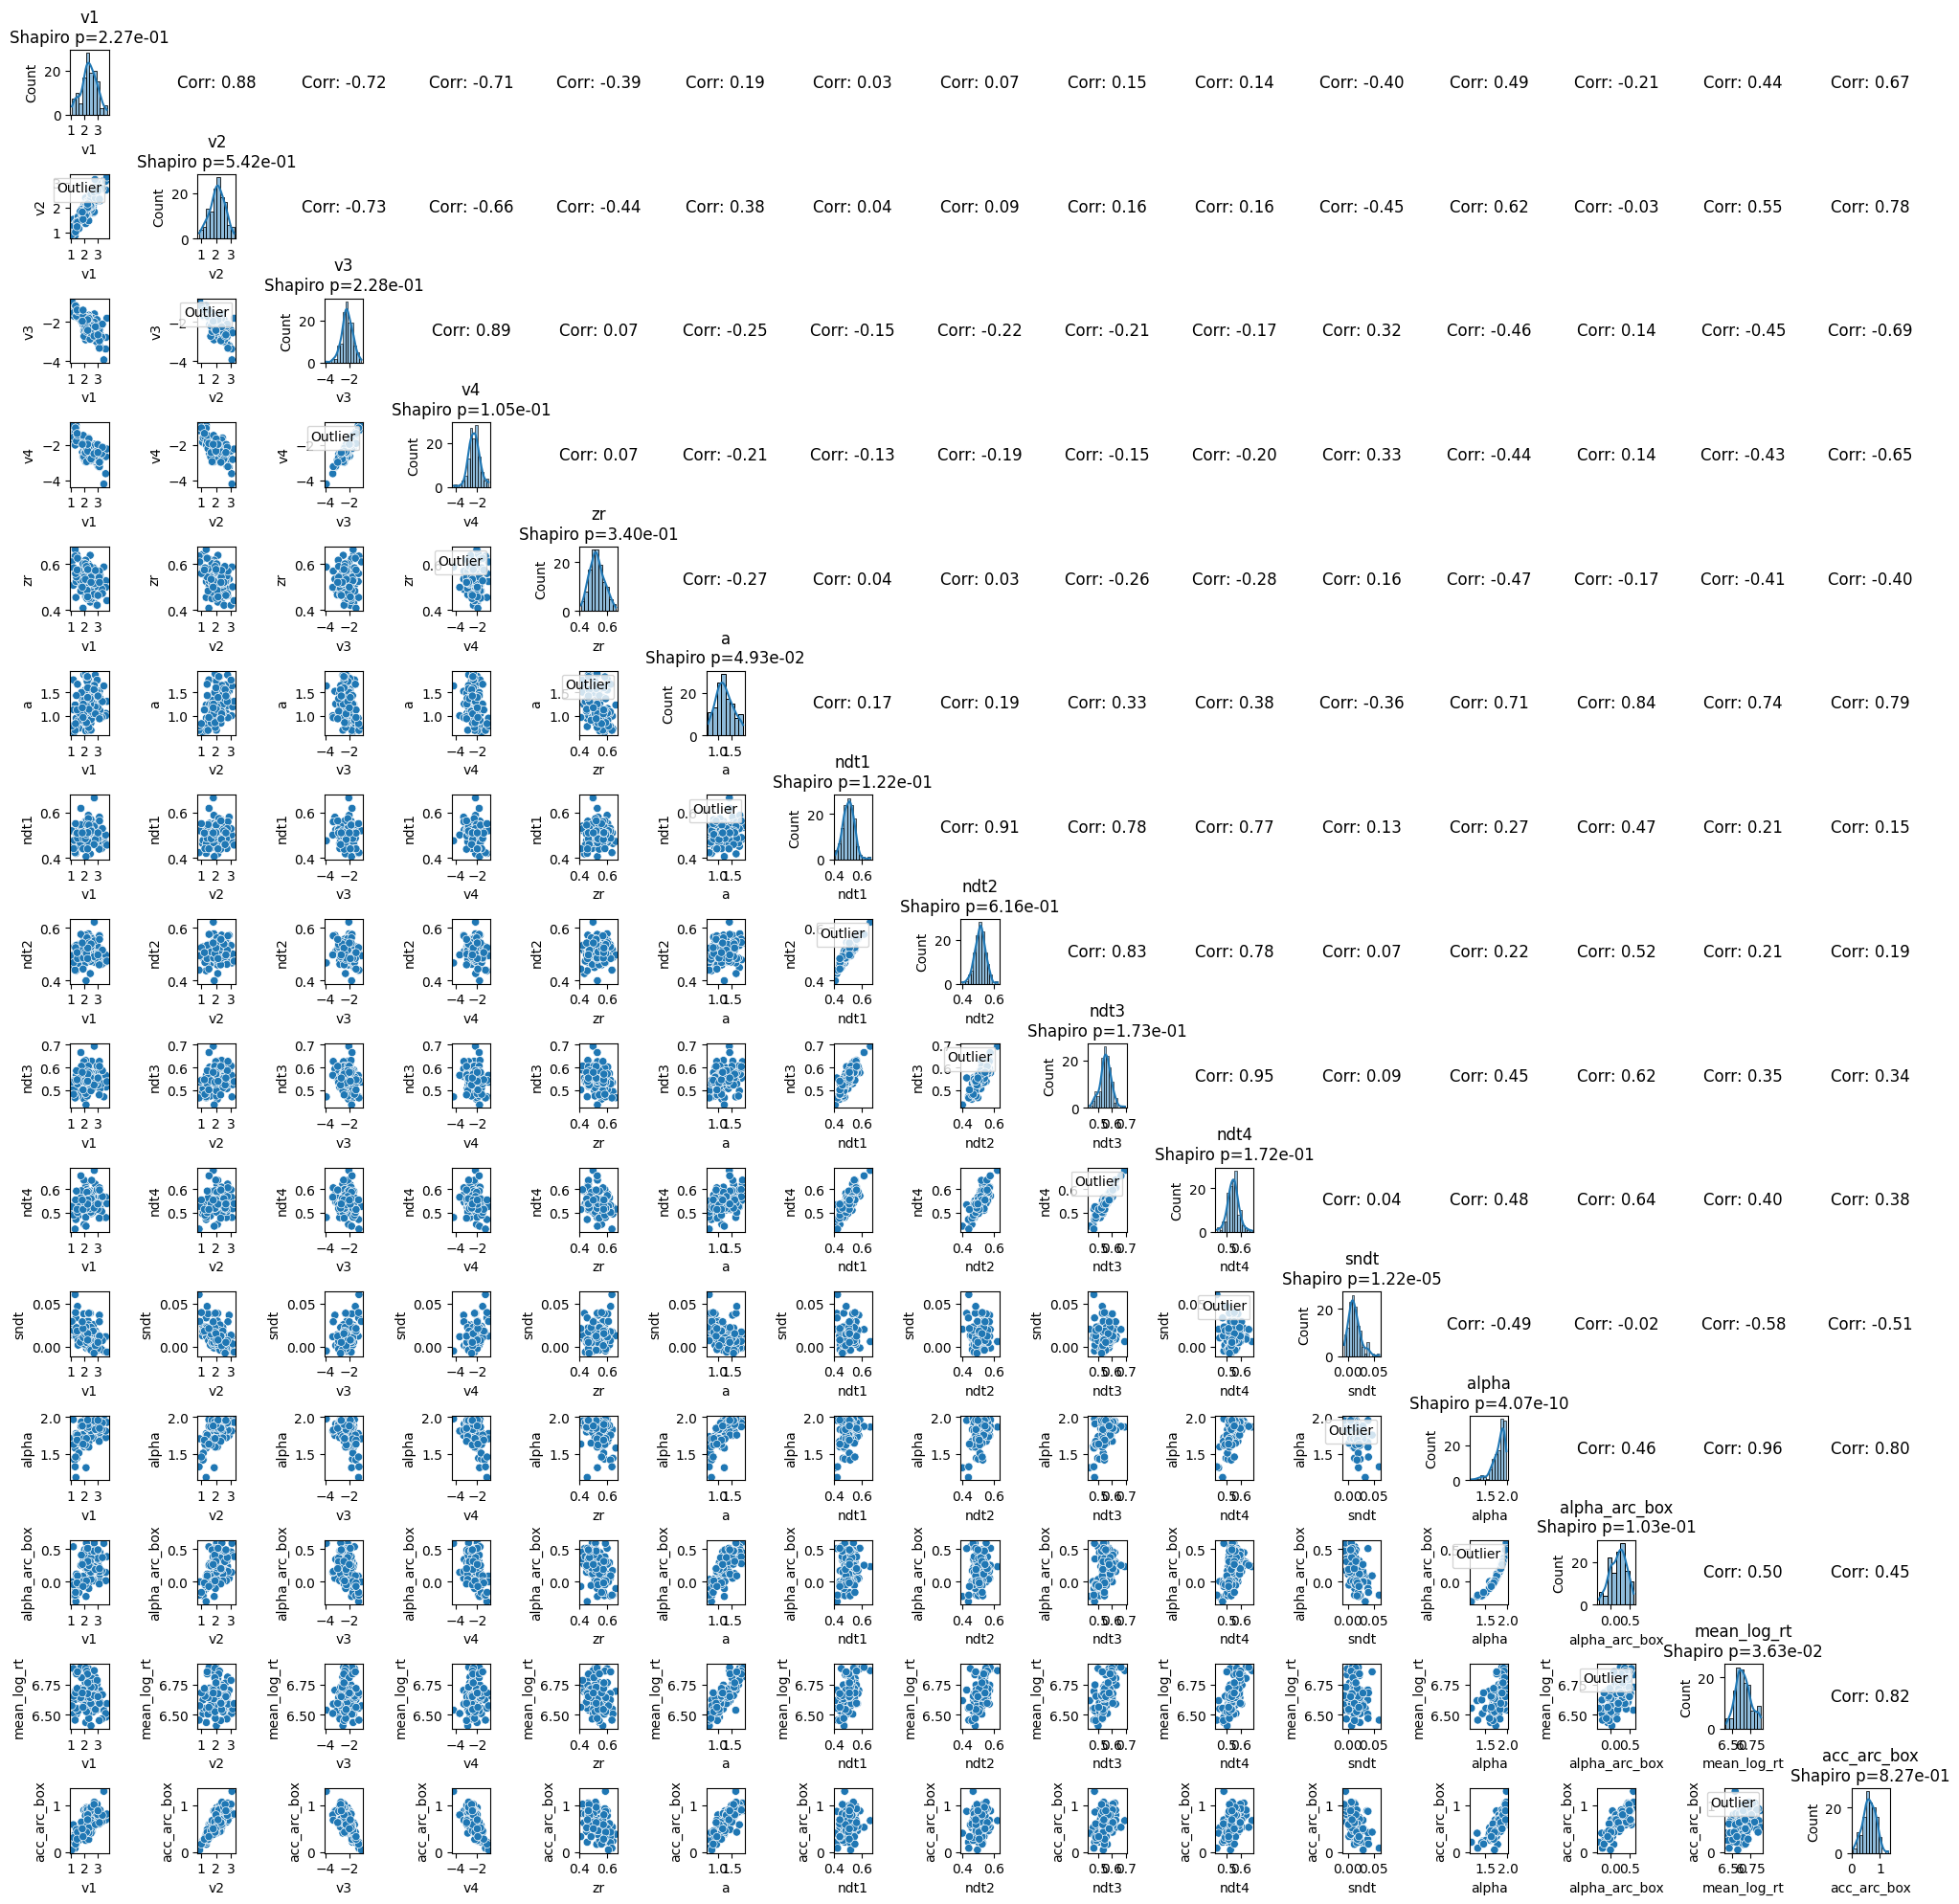

In [24]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations

# Function to calculate Mahalanobis distance
def safe_mahalanobis(x=None, data=None, cov=None):
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

# Load your data
#data = pd.read_csv('study2_associative_session_1_data_transformed.csv')  # Replace with your file path

# Define your parameters
selected_params = ['v1_mean',
 'v2_mean',
 'v3_mean',
 'v4_mean',
 'zr_mean',
 'a_mean',
 'ndt1_mean',
 'ndt2_mean',
 'ndt3_mean',
 'ndt4_mean',
 'sndt_mean',
 'alpha_mean',
    'mean_log_rt',
    'alpha_mean_boxcox_after_arcsin',
    'accuracy_percentage_boxcox_after_arcsin']

# Renaming for simplicity
renamed_params = {
    'v1_mean': 'v1', 'v2_mean': 'v2','v3_mean': 'v3','v4_mean': 'v4',
    'zr_mean': 'zr', 'a_mean': 'a', 
    'ndt1_mean': 'ndt1','ndt2_mean': 'ndt2','ndt3_mean': 'ndt3','ndt4_mean': 'ndt4',
    'sndt_mean': 'sndt', 'alpha_mean': 'alpha', 
    'alpha_mean_boxcox_after_arcsin': 'alpha_arc_box', 
    'mean_log_rt': 'mean_log_rt', 
    'accuracy_percentage_boxcox_after_arcsin': 'acc_arc_box'
}
data_renamed = data.rename(columns=renamed_params)

# Prepare for outlier detection and correlation
correlation_matrix = pd.DataFrame(index=selected_params, columns=selected_params)
p_value = 0.001

# Process each pair of parameters
for pair in combinations(selected_params, 2):
    pair_data = data[list(pair)]
    mahal_distances = safe_mahalanobis(x=pair_data, data=pair_data)
    threshold = stats.chi2.ppf((1 - p_value), df=2)
    outliers = mahal_distances > threshold
    correlation = pair_data[~outliers].corr().iloc[0, 1]
    correlation_matrix.loc[pair[0], pair[1]] = correlation
    correlation_matrix.loc[pair[1], pair[0]] = correlation

np.fill_diagonal(correlation_matrix.values, np.nan)
correlation_matrix_renamed = correlation_matrix.rename(columns=renamed_params, index=renamed_params)

# Shapiro-Wilk test
shapiro_results = {}
for param in selected_params:
    shapiro_test = stats.shapiro(data[param])
    shapiro_results[param] = shapiro_test[1]
shapiro_results_renamed = {renamed_params[key]: value for key, value in shapiro_results.items()}

# Create the visualization
plt.figure(figsize=(20, 20))
for i, param_i in enumerate(renamed_params.values()):
    for j, param_j in enumerate(renamed_params.values()):
        plt.subplot(len(renamed_params), len(renamed_params), i*len(renamed_params) + j + 1)
        if i == j:
            sns.histplot(data_renamed[param_i], kde=True)
            plt.title(f'{param_i}\nShapiro p={shapiro_results_renamed[param_i]:.2e}')
        elif i > j:
            scatter_plot = sns.scatterplot(data=data_renamed, x=param_j, y=param_i, hue=outliers, legend=False)
            if i == j + 1:
                scatter_plot.legend(loc='upper right', title='Outlier', prop={'size': 6})
          #  plt.title(f'Scatter Plot\n({param_j} vs {param_i})')
        else:
            plt.text(0.5, 0.5, f'Corr: {correlation_matrix_renamed.iloc[i, j]:.2f}', 
                     horizontalalignment='center', verticalalignment='center', fontsize=12)
            plt.axis('off')

plt.tight_layout()
plt.savefig('Study2_all_par_ave_in_subject_level_distinct_correlation_Plot_renamed.png')  # Saves the plot to a file
plt.show()
plt.close()



In [25]:
correlation_matrix_renamed = correlation_matrix_renamed.fillna(1)
correlation_matrix_renamed = correlation_matrix_renamed.round(3)
correlation_matrix_renamed

,v1,v2,v3,v4,zr,a,ndt1,ndt2,ndt3,ndt4,sndt,alpha,mean_log_rt,alpha_arc_box,acc_arc_box
v1,1.000,0.883,-0.722,-0.709,-0.388,0.188,0.031,0.069,0.150,0.135,-0.399,0.487,-0.207,0.441,0.668
v2,0.883,1.000,-0.726,-0.658,-0.440,0.377,0.036,0.094,0.159,0.163,-0.448,0.616,-0.034,0.555,0.781
v3,-0.722,-0.726,1.000,0.888,0.073,-0.247,-0.151,-0.222,-0.212,-0.167,0.320,-0.457,0.136,-0.447,-0.692
v4,-0.709,-0.658,0.888,1.000,0.068,-0.207,-0.134,-0.194,-0.153,-0.198,0.332,-0.439,0.137,-0.429,-0.649
zr,-0.388,-0.440,0.073,0.068,1.000,-0.270,0.045,0.031,-0.264,-0.283,0.158,-0.470,-0.174,-0.409,-0.397
a,0.188,0.377,-0.247,-0.207,-0.270,1.000,0.173,0.194,0.325,0.385,-0.356,0.711,0.839,0.745,0.795
ndt1,0.031,0.036,-0.151,-0.134,0.045,0.173,1.000,0.911,0.783,0.771,0.125,0.266,0.466,0.209,0.147
ndt2,0.069,0.094,-0.222,-0.194,0.031,0.194,0.911,1.000,0.825,0.782,0.068,0.216,0.518,0.213,0.193
ndt3,0.150,0.159,-0.212,-0.153,-0.264,0.325,0.783,0.825,1.000,0.949,0.085,0.447,0.625,0.353,0.338
ndt4,0.135,0.163,-0.167,-0.198,-0.283,0.385,0.771,0.782,0.949,1.000,0.043,0.478,0.637,0.398,0.378


In [26]:
correlation_matrix_renamed.to_csv('Study_2_all_par_ave_in_subject_level_distinct_correlation_matrix_renamed.csv',index=False)

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axi

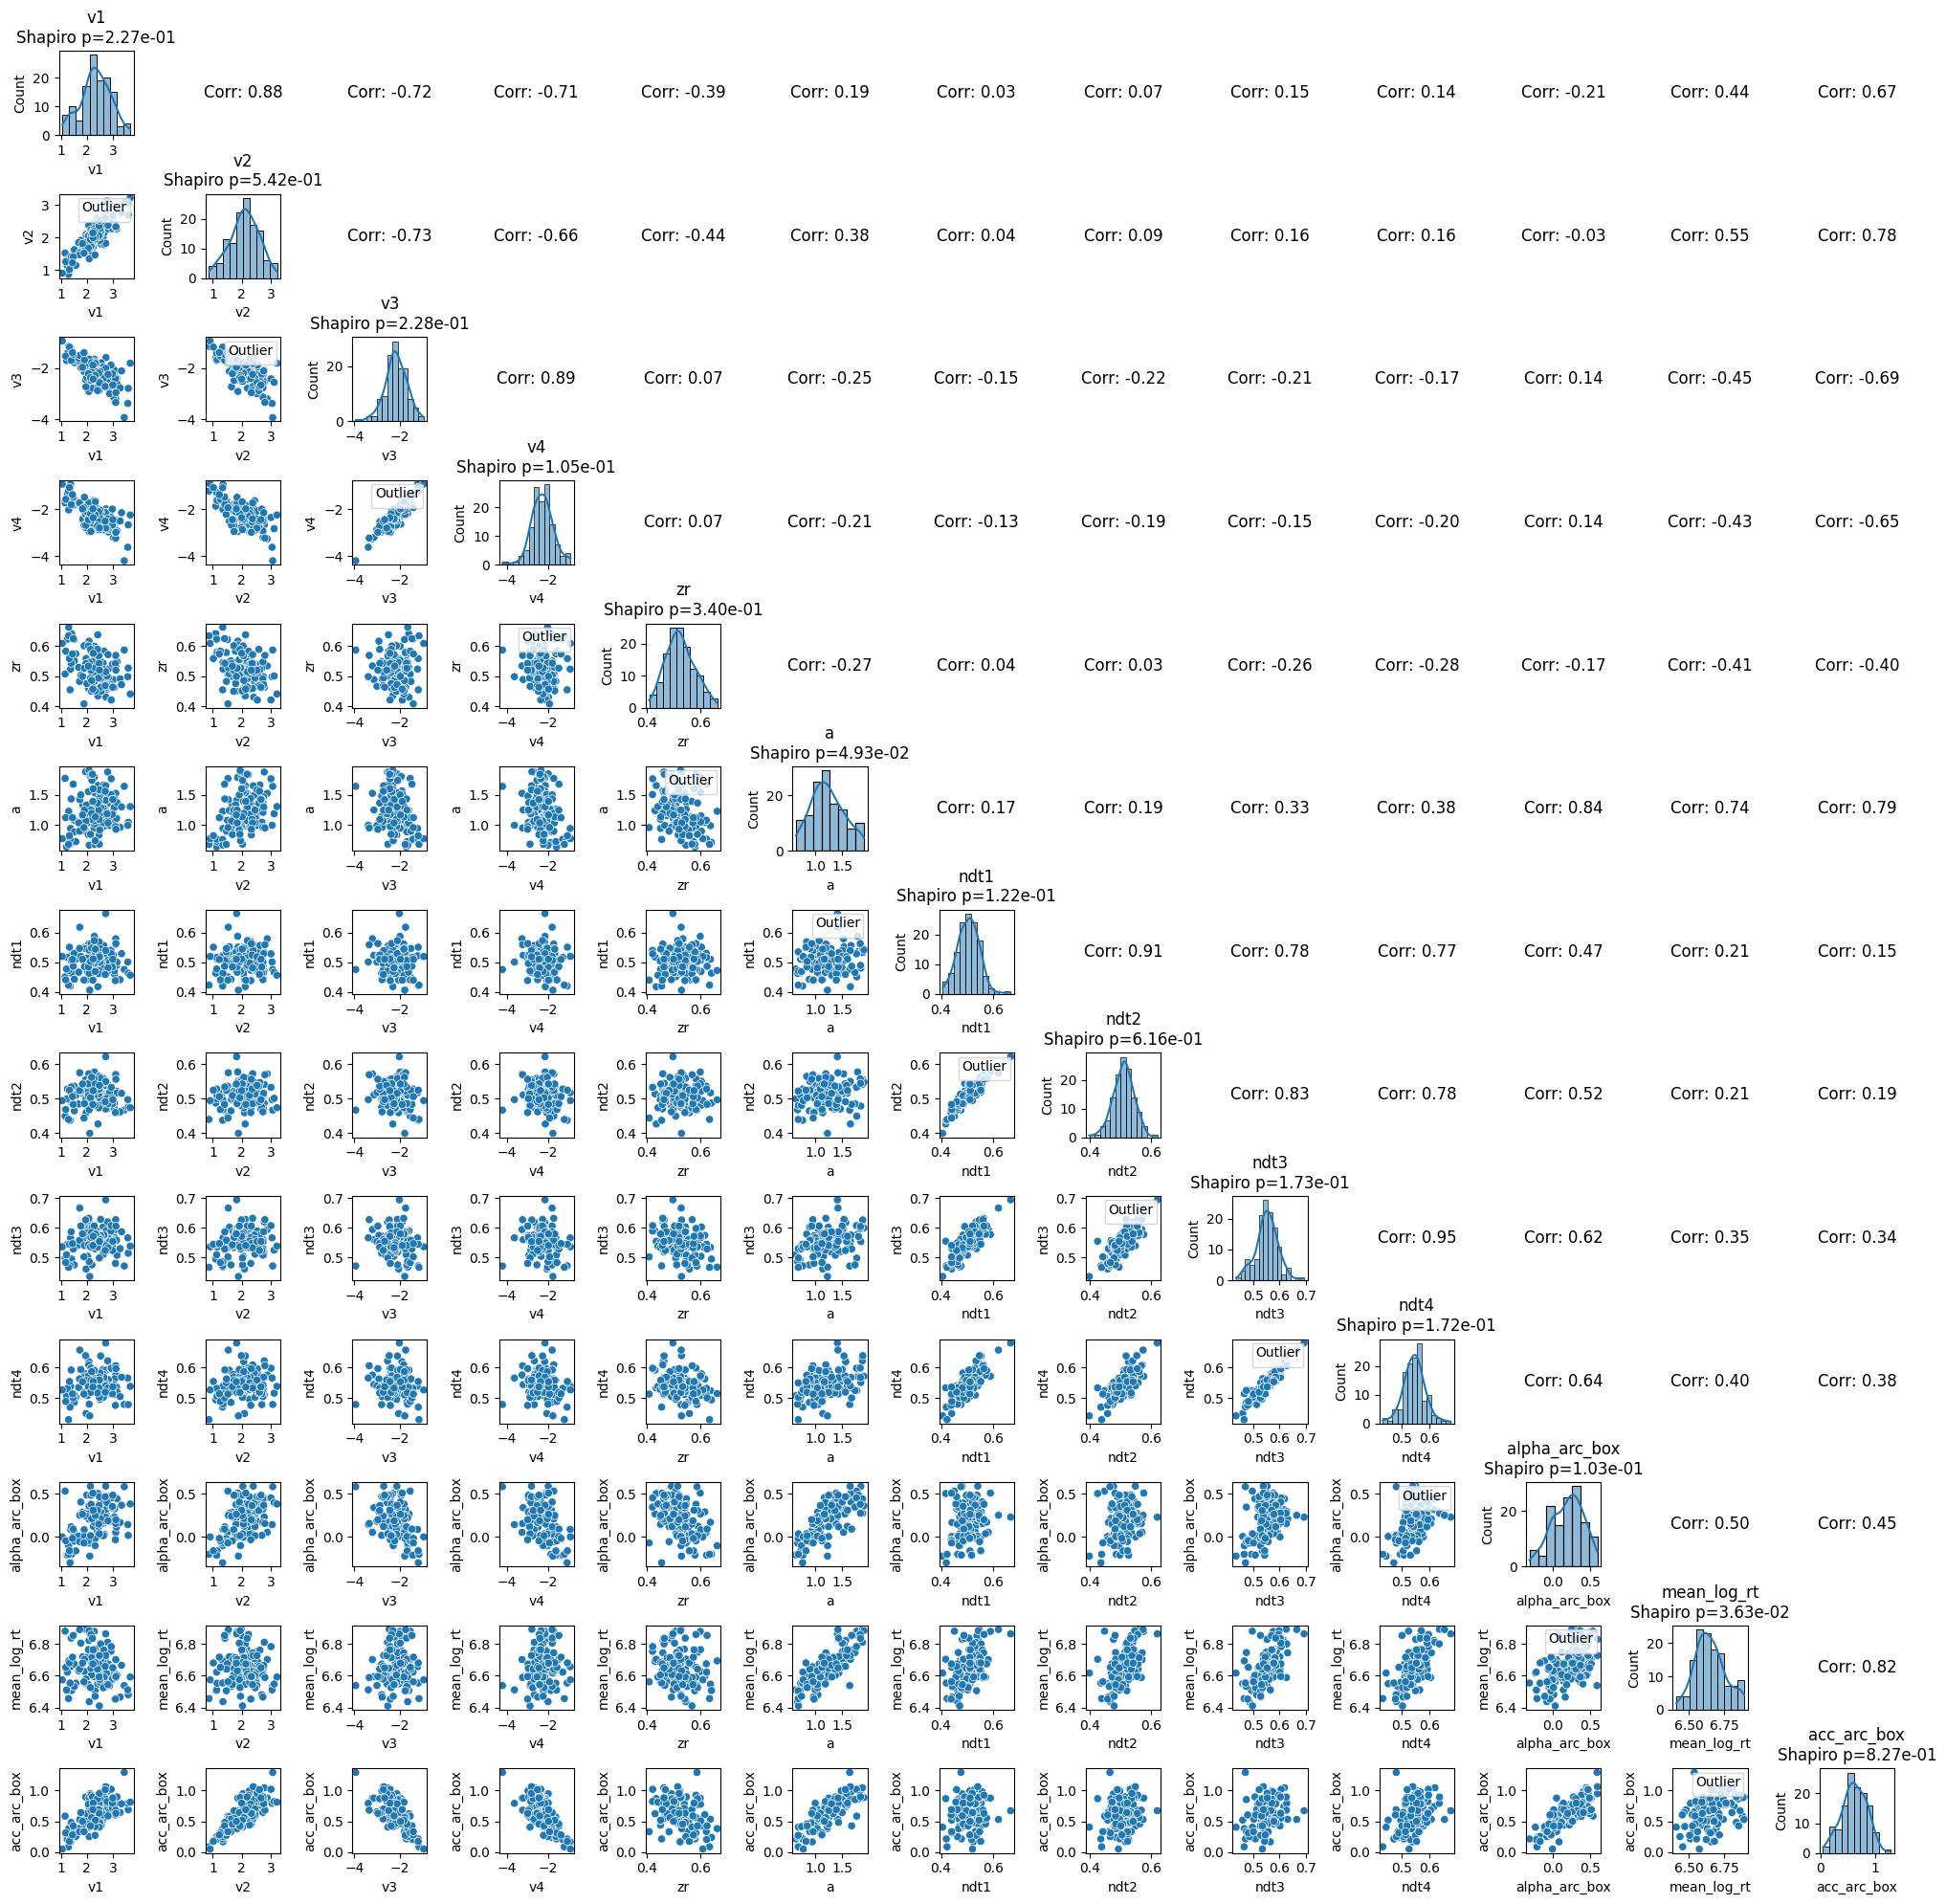

In [27]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations

# Function to calculate Mahalanobis distance
def safe_mahalanobis(x=None, data=None, cov=None):
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

# Load your data
#data = pd.read_csv('study2_associative_session_1_data_transformed.csv')  # Replace with your file path

# Define your parameters
selected_params = ['v1_mean',
 'v2_mean',
 'v3_mean',
 'v4_mean',
 'zr_mean',
 'a_mean',
 'ndt1_mean',
 'ndt2_mean',
 'ndt3_mean',
 'ndt4_mean',
# 'sndt_mean',
# 'alpha_mean',
    'mean_log_rt',
    'alpha_mean_boxcox_after_arcsin',
    'accuracy_percentage_boxcox_after_arcsin']

# Renaming for simplicity
renamed_params = {
    'v1_mean': 'v1', 'v2_mean': 'v2','v3_mean': 'v3','v4_mean': 'v4',
    'zr_mean': 'zr', 'a_mean': 'a', 
    'ndt1_mean': 'ndt1','ndt2_mean': 'ndt2','ndt3_mean': 'ndt3','ndt4_mean': 'ndt4',
    #'sndt_mean': 'sndt', 'alpha_mean': 'alpha', 
    'alpha_mean_boxcox_after_arcsin': 'alpha_arc_box', 
    'mean_log_rt': 'mean_log_rt', 
    'accuracy_percentage_boxcox_after_arcsin': 'acc_arc_box'
}
data_renamed = data.rename(columns=renamed_params)

# Prepare for outlier detection and correlation
correlation_matrix = pd.DataFrame(index=selected_params, columns=selected_params)
p_value = 0.001

# Process each pair of parameters
for pair in combinations(selected_params, 2):
    pair_data = data[list(pair)]
    mahal_distances = safe_mahalanobis(x=pair_data, data=pair_data)
    threshold = stats.chi2.ppf((1 - p_value), df=2)
    outliers = mahal_distances > threshold
    correlation = pair_data[~outliers].corr().iloc[0, 1]
    correlation_matrix.loc[pair[0], pair[1]] = correlation
    correlation_matrix.loc[pair[1], pair[0]] = correlation

np.fill_diagonal(correlation_matrix.values, np.nan)
correlation_matrix_renamed = correlation_matrix.rename(columns=renamed_params, index=renamed_params)

# Shapiro-Wilk test
shapiro_results = {}
for param in selected_params:
    shapiro_test = stats.shapiro(data[param])
    shapiro_results[param] = shapiro_test[1]
shapiro_results_renamed = {renamed_params[key]: value for key, value in shapiro_results.items()}

# Create the visualization
plt.figure(figsize=(20, 20))
for i, param_i in enumerate(renamed_params.values()):
    for j, param_j in enumerate(renamed_params.values()):
        plt.subplot(len(renamed_params), len(renamed_params), i*len(renamed_params) + j + 1)
        if i == j:
            sns.histplot(data_renamed[param_i], kde=True)
            plt.title(f'{param_i}\nShapiro p={shapiro_results_renamed[param_i]:.2e}')
        elif i > j:
            scatter_plot = sns.scatterplot(data=data_renamed, x=param_j, y=param_i, hue=outliers, legend=False)
            if i == j + 1:
                scatter_plot.legend(loc='upper right', title='Outlier', prop={'size': 6})
           # plt.title(f'Scatter Plot\n({param_j} vs {param_i})')
        else:
            plt.text(0.5, 0.5, f'Corr: {correlation_matrix_renamed.iloc[i, j]:.2f}', 
                     horizontalalignment='center', verticalalignment='center', fontsize=12)
            plt.axis('off')

plt.tight_layout()
plt.show()
#plt.savefig('APT_S1_correlation_matrix_plot.png')  # Saves the plot to a file
plt.close()



In [28]:
correlation_matrix_renamed

,v1,v2,v3,v4,zr,a,ndt1,ndt2,ndt3,ndt4,mean_log_rt,alpha_arc_box,acc_arc_box
v1,NaN,0.883344,-0.722104,-0.709105,-0.388379,0.18758,0.030623,0.068717,0.149927,0.135277,-0.206643,0.440897,0.667966
v2,0.883344,NaN,-0.725934,-0.658037,-0.439902,0.376782,0.036113,0.094153,0.159036,0.163105,-0.034362,0.554625,0.781165
v3,-0.722104,-0.725934,NaN,0.888062,0.072586,-0.247453,-0.150534,-0.221837,-0.211759,-0.166898,0.135884,-0.447194,-0.692223
v4,-0.709105,-0.658037,0.888062,NaN,0.068178,-0.206631,-0.133791,-0.19394,-0.153074,-0.197988,0.136648,-0.428596,-0.648737
zr,-0.388379,-0.439902,0.072586,0.068178,NaN,-0.269985,0.044989,0.031248,-0.264495,-0.282947,-0.173777,-0.409074,-0.39687
a,0.18758,0.376782,-0.247453,-0.206631,-0.269985,NaN,0.173412,0.19385,0.325259,0.384667,0.839388,0.74478,0.794658
ndt1,0.030623,0.036113,-0.150534,-0.133791,0.044989,0.173412,NaN,0.910888,0.783143,0.771402,0.466385,0.209069,0.147157
ndt2,0.068717,0.094153,-0.221837,-0.19394,0.031248,0.19385,0.910888,NaN,0.825419,0.781931,0.517859,0.213435,0.192862
ndt3,0.149927,0.159036,-0.211759,-0.153074,-0.264495,0.325259,0.783143,0.825419,NaN,0.949103,0.62497,0.352669,0.338214
ndt4,0.135277,0.163105,-0.166898,-0.197988,-0.282947,0.384667,0.771402,0.781931,0.949103,NaN,0.636507,0.397929,0.377914


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axi

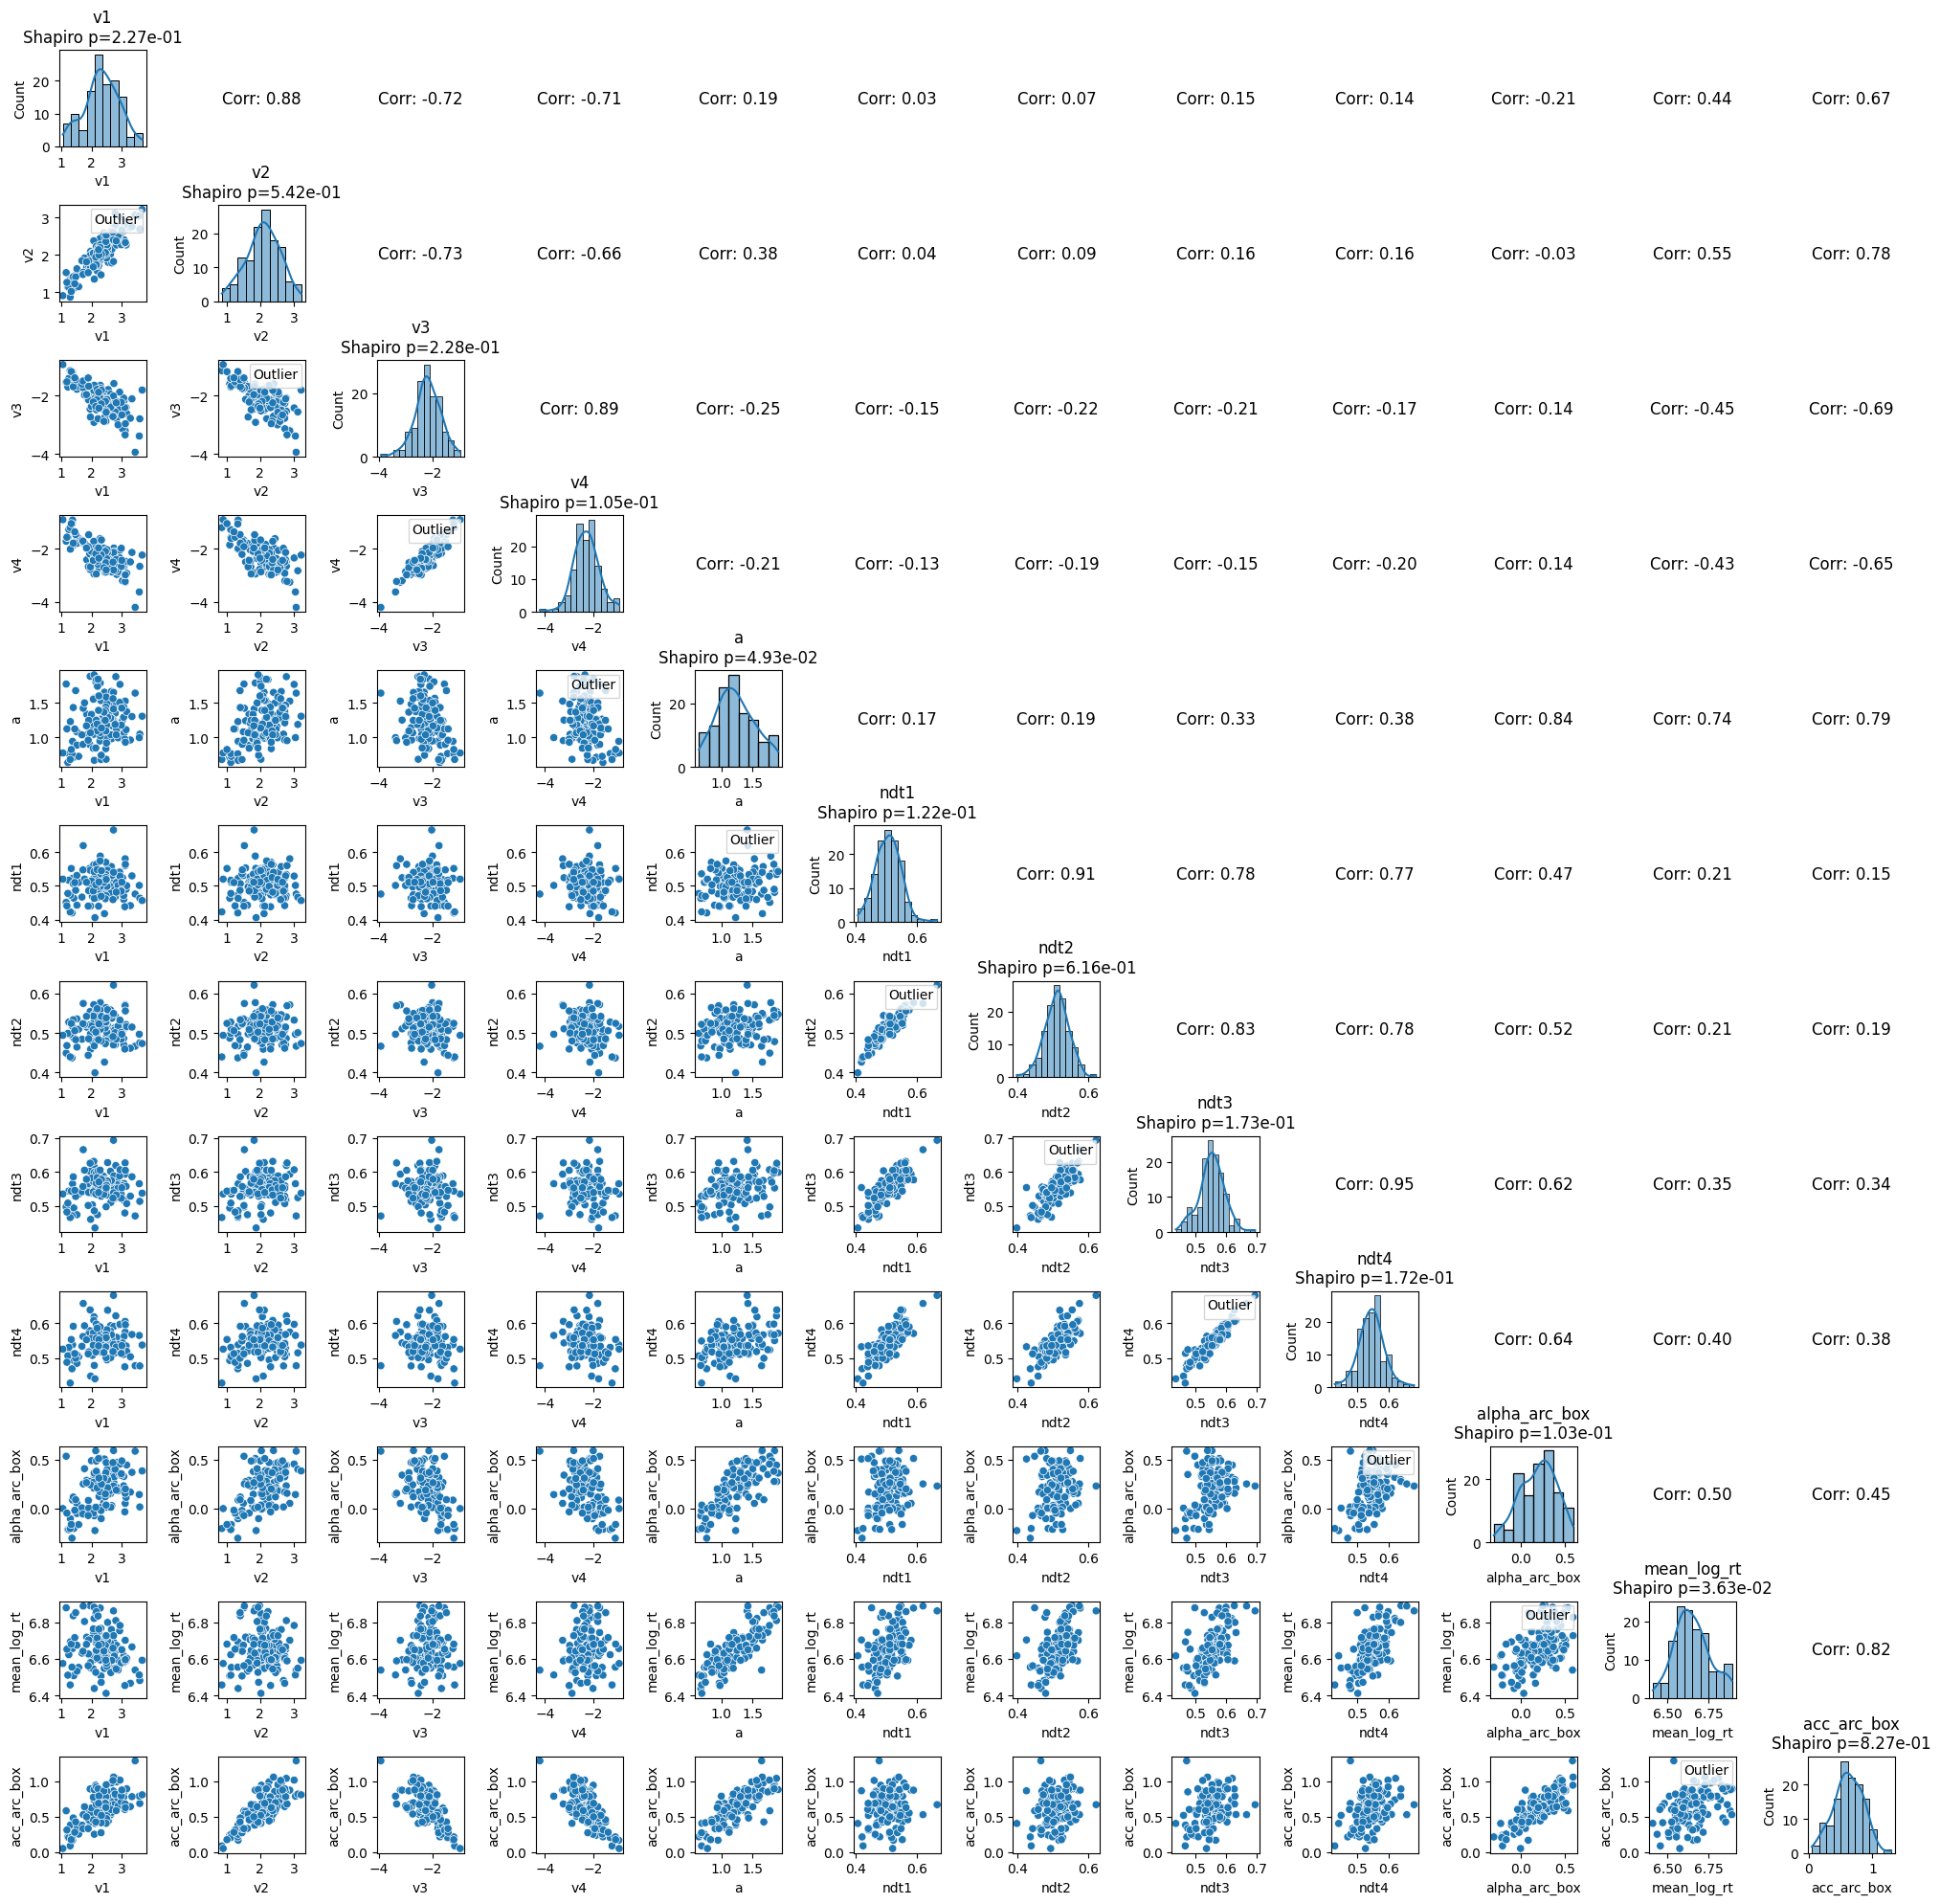

In [29]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations

# Function to calculate Mahalanobis distance
def safe_mahalanobis(x=None, data=None, cov=None):
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

# Load your data
#data = pd.read_csv('study2_associative_session_1_data_transformed.csv')  # Replace with your file path

# Define your parameters
selected_params = ['v1_mean',
 'v2_mean',
 'v3_mean',
 'v4_mean',
# 'zr_mean',
 'a_mean',
 'ndt1_mean',
 'ndt2_mean',
 'ndt3_mean',
 'ndt4_mean',
# 'sndt_mean',
# 'alpha_mean',
    'mean_log_rt',
    'alpha_mean_boxcox_after_arcsin',
    'accuracy_percentage_boxcox_after_arcsin']

# Renaming for simplicity
renamed_params = {
    'v1_mean': 'v1', 'v2_mean': 'v2','v3_mean': 'v3','v4_mean': 'v4',
   # 'zr_mean': 'zr', 
    'a_mean': 'a', 
    'ndt1_mean': 'ndt1','ndt2_mean': 'ndt2','ndt3_mean': 'ndt3','ndt4_mean': 'ndt4',
    #'sndt_mean': 'sndt', 'alpha_mean': 'alpha', 
    'alpha_mean_boxcox_after_arcsin': 'alpha_arc_box', 
    'mean_log_rt': 'mean_log_rt', 
    'accuracy_percentage_boxcox_after_arcsin': 'acc_arc_box'
}
data_renamed = data.rename(columns=renamed_params)

# Prepare for outlier detection and correlation
correlation_matrix = pd.DataFrame(index=selected_params, columns=selected_params)
p_value = 0.001

# Process each pair of parameters
for pair in combinations(selected_params, 2):
    pair_data = data[list(pair)]
    mahal_distances = safe_mahalanobis(x=pair_data, data=pair_data)
    threshold = stats.chi2.ppf((1 - p_value), df=2)
    outliers = mahal_distances > threshold
    correlation = pair_data[~outliers].corr().iloc[0, 1]
    correlation_matrix.loc[pair[0], pair[1]] = correlation
    correlation_matrix.loc[pair[1], pair[0]] = correlation

np.fill_diagonal(correlation_matrix.values, np.nan)
correlation_matrix_renamed = correlation_matrix.rename(columns=renamed_params, index=renamed_params)

# Shapiro-Wilk test
shapiro_results = {}
for param in selected_params:
    shapiro_test = stats.shapiro(data[param])
    shapiro_results[param] = shapiro_test[1]
shapiro_results_renamed = {renamed_params[key]: value for key, value in shapiro_results.items()}

# Create the visualization
plt.figure(figsize=(20, 20))
for i, param_i in enumerate(renamed_params.values()):
    for j, param_j in enumerate(renamed_params.values()):
        plt.subplot(len(renamed_params), len(renamed_params), i*len(renamed_params) + j + 1)
        if i == j:
            sns.histplot(data_renamed[param_i], kde=True)
            plt.title(f'{param_i}\nShapiro p={shapiro_results_renamed[param_i]:.2e}')
        elif i > j:
            scatter_plot = sns.scatterplot(data=data_renamed, x=param_j, y=param_i, hue=outliers, legend=False)
            if i == j + 1:
                scatter_plot.legend(loc='upper right', title='Outlier', prop={'size': 6})
           # plt.title(f'Scatter Plot\n({param_j} vs {param_i})')
        else:
            plt.text(0.5, 0.5, f'Corr: {correlation_matrix_renamed.iloc[i, j]:.2f}', 
                     horizontalalignment='center', verticalalignment='center', fontsize=12)
            plt.axis('off')

plt.tight_layout()
plt.show()
plt.savefig('APT_S1_correlation_matrix_plot.png')  # Saves the plot to a file
plt.close()



In [30]:
correlation_matrix_renamed

,v1,v2,v3,v4,a,ndt1,ndt2,ndt3,ndt4,mean_log_rt,alpha_arc_box,acc_arc_box
v1,NaN,0.883344,-0.722104,-0.709105,0.18758,0.030623,0.068717,0.149927,0.135277,-0.206643,0.440897,0.667966
v2,0.883344,NaN,-0.725934,-0.658037,0.376782,0.036113,0.094153,0.159036,0.163105,-0.034362,0.554625,0.781165
v3,-0.722104,-0.725934,NaN,0.888062,-0.247453,-0.150534,-0.221837,-0.211759,-0.166898,0.135884,-0.447194,-0.692223
v4,-0.709105,-0.658037,0.888062,NaN,-0.206631,-0.133791,-0.19394,-0.153074,-0.197988,0.136648,-0.428596,-0.648737
a,0.18758,0.376782,-0.247453,-0.206631,NaN,0.173412,0.19385,0.325259,0.384667,0.839388,0.74478,0.794658
ndt1,0.030623,0.036113,-0.150534,-0.133791,0.173412,NaN,0.910888,0.783143,0.771402,0.466385,0.209069,0.147157
ndt2,0.068717,0.094153,-0.221837,-0.19394,0.19385,0.910888,NaN,0.825419,0.781931,0.517859,0.213435,0.192862
ndt3,0.149927,0.159036,-0.211759,-0.153074,0.325259,0.783143,0.825419,NaN,0.949103,0.62497,0.352669,0.338214
ndt4,0.135277,0.163105,-0.166898,-0.197988,0.384667,0.771402,0.781931,0.949103,NaN,0.636507,0.397929,0.377914
mean_log_rt,-0.206643,-0.034362,0.135884,0.136648,0.839388,0.466385,0.517859,0.62497,0.636507,NaN,0.495799,0.447024
